In [99]:
import os
import cv2
import numpy as np
import time
import random

In [100]:

root_path = os.getcwd()
train_path = root_path+ '/cats_and_dogs_filtered/train'
test_path = root_path+ '/cats_and_dogs_filtered/test'

In [101]:
img_width = 128
img_height = 128
BATCH_SIZE = 32


def load_img(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img,(img_width, img_height))
    return img

In [102]:
X_train,Y_train = [],[]
X_test,Y_test = [],[]

def load_test_img(img_path):

    temp_X, temp_Y = [], []
    for cur_class in os.listdir(img_path):
        label = ""
        if cur_class == '.DS_Store':
            continue
        
        if cur_class == "cats":
            label = [1,0]
        else:
            label = [0,1]

        for filename in os.listdir(img_path+"/"+cur_class):
            if filename == '.DS_Store':
                continue

            full_img_path = img_path+"/"+cur_class+"/"+filename
            img = load_img(full_img_path)
            temp_X.append(img)
            temp_Y.append(label)
            
    return np.array(temp_X), np.array(temp_Y)

In [103]:
X_train,Y_train = load_test_img(train_path)
X_test,Y_test = load_test_img(test_path)

print("X_train shape: ", X_train.shape)
print("Y_train shape: ", Y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", Y_test.shape)


X_train shape:  (2752, 128, 128, 3)
Y_train shape:  (2752, 2)
X_test shape:  (248, 128, 128, 3)
Y_test shape:  (248, 2)


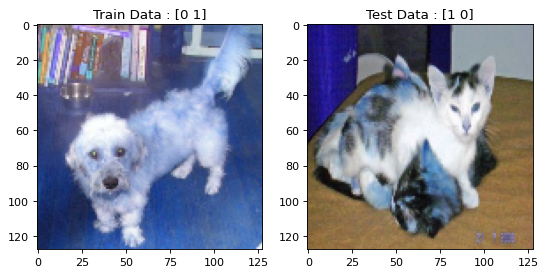

In [104]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

index = random.randint(0, len(X_test)-1)

figure(figsize=(8, 6), dpi=80)
plt.subplot(1,2,1)
plt.title(f"Train Data : {Y_train[index]}")
plt.imshow(X_train[index])


plt.subplot(1,2,2)
plt.title(f"Test Data : {Y_test[index]}")
plt.imshow(X_test[index])



plt.show()

### MLP model training

In [105]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Rescaling


In [106]:
mlp_model = Sequential([
    Rescaling(1./255, input_shape=(img_width, img_height, 3)),
    
    Flatten(),
    
    Dense(67, activation='relu'),
    
    Dense(2, activation='sigmoid')
])

mlp_model.compile(optimizer='adam',
                  loss='categorical_crossentropy', # binary_crossentropy for binary classification
                  metrics=['accuracy'])
mlp_model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_13 (Rescaling)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 67)             │     3,293,251 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 2)              │           136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,293,387 (12.56 MB)

 Trainable params: 3,293,387 (12.56 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
mlp_history = mlp_model.fit(X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10,
    batch_size=BATCH_SIZE
)

Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.4956 - loss: 34.1976 - val_accuracy: 0.5363 - val_loss: 1.1891
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5377 - loss: 1.0946 - val_accuracy: 0.4839 - val_loss: 0.9572
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5573 - loss: 0.8833 - val_accuracy: 0.5726 - val_loss: 0.8900
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5646 - loss: 0.9085 - val_accuracy: 0.4879 - val_loss: 0.9407
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5558 - loss: 1.0259 - val_accuracy: 0.5121 - val_loss: 0.8096
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5828 - loss: 0.9244 - val_accuracy: 0.5565 - val_loss: 1.0477
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6337 - loss: 0.7358 - val_accuracy: 0.5161 - val_loss: 0.9076
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.5745 - loss: 1.1082 - val_accuracy: 0.4637 - 

In [108]:
print("--- Evaluating MLP on Test Data ---")
mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, Y_test)
print(f"MLP Test Accuracy: {mlp_accuracy:.4f}")


--- Evaluating MLP on Test Data ---
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7353 - loss: 0.7228
MLP Test Accuracy: 0.4758


### CNN model

In [109]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.layers import RandomFlip, RandomRotation, RandomZoom

In [110]:
model = Sequential([
    # Input layer: Rescale pixel values from [0, 255] to [0, 1]
    Rescaling(1./255, input_shape=(img_width, img_height, 3)),

    # Data Augmentation: Helps prevent overfitting by creating modified images
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1),

    # Convolutional blocks (as before)
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    # Flatten and Classify
    Flatten(),
    Dense(128, activation='relu'),
    # Output layer: Use 1 neuron and sigmoid for binary classification (cat vs dog)
    Dense(2, activation='sigmoid')
])

In [111]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy', # binary_crossentropy for binary classification
              metrics=['accuracy'])

In [112]:
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_14 (Rescaling)        │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_5 (RandomFlip)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_5               │ (None, 128, 128, 3)    │             0 │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_5 (RandomZoom)      │ (None, 128, 128, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_14 (Flatten)            │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=10, # Train for more epochs on a real dataset
    batch_size=BATCH_SIZE
)


Epoch 1/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.5017 - loss: 0.7876 - val_accuracy: 0.5685 - val_loss: 0.6878
Epoch 2/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.5438 - loss: 0.6848 - val_accuracy: 0.5242 - val_loss: 0.6817
Epoch 3/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.5855 - loss: 0.6663 - val_accuracy: 0.6492 - val_loss: 0.6202
Epoch 4/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6280 - loss: 0.6397 - val_accuracy: 0.6452 - val_loss: 0.6125
Epoch 5/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - accuracy: 0.6669 - loss: 0.6290 - val_accuracy: 0.6573 - val_loss: 0.6078
Epoch 6/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 39ms/step - accuracy: 0.6524 - loss: 0.6207 - val_accuracy: 0.6371 - val_loss: 0.6289
Epoch 7/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.6941 - loss: 0.6059 - val_accuracy: 0.6653 - val_loss: 0.6069
Epoch 8/20
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.6686 - loss: 0.6023 - val_accuracy: 0.5323 - v